##Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score

## Membaca Dataset

In [4]:
data = pd.read_csv("heart.csv")

##Exploratory Data Analysis (EDA)

In [5]:
# Menampilkan data teratas
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# Menampilkan data terbawah
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
# Menampilkan banyak nilai dari target
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

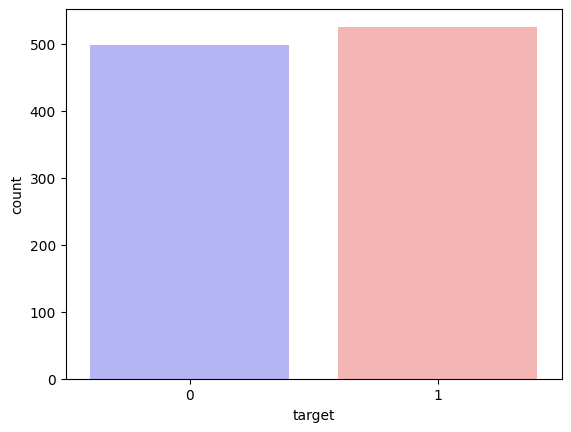

In [8]:
# Menampilkan grafik dari banyaknya nilai dari target
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

In [9]:
# Menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
# Menampilkan data yang hilang
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Persentase dari pasien yang tidak mempunyai penyakit jantung: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Persentase dari pasien yang mempunyai penyakit jantung: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Persentase dari pasien yang tidak mempunyai penyakit jantung: 48.68%
Persentase dari pasien yang mempunyai penyakit jantung: 51.32%


In [13]:
# Menampilkan banyak nilai dari sex
data.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [14]:
# Membandingkan kolom target dengan sex
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,86,413
1,226,300


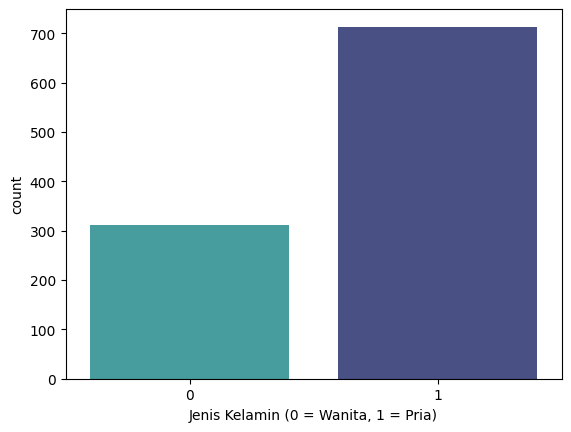

In [15]:
# Menampilkan grafik dari banyaknya nilai dari sex
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Jenis Kelamin (0 = Wanita, 1 = Pria)")
plt.show()

In [16]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Persentase dari pasien Wanita: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Persentase dari pasien Pria: {:.2f}%".format((countMale / (len(data.sex))*100)))

Persentase dari pasien Wanita: 30.44%
Persentase dari pasien Pria: 69.56%


In [17]:
# Menampilkan nilai rata-rata dari nilai target
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


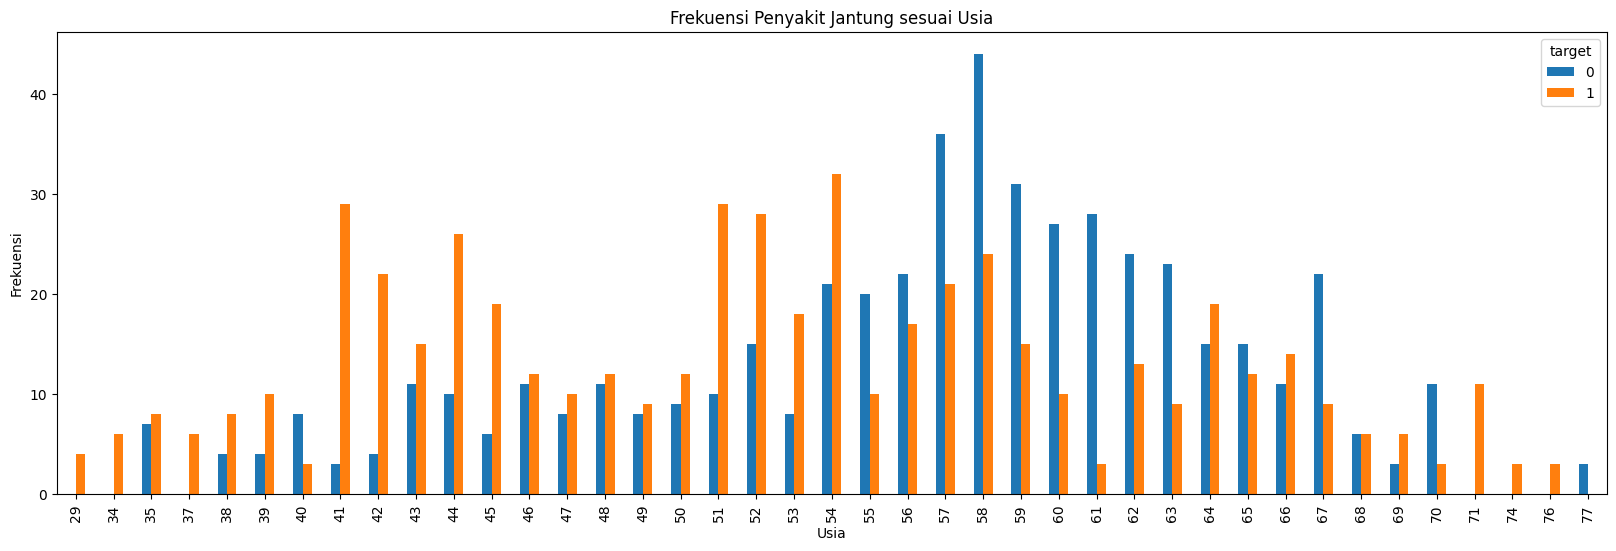

In [18]:
# Membuat plot crosstab
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Frekuensi Penyakit Jantung sesuai Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

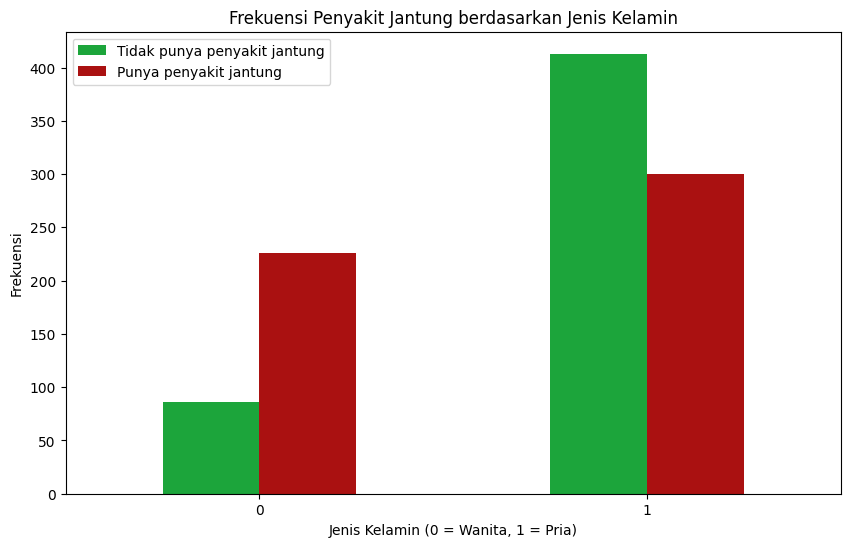

In [19]:
# Membuat plot crosstab
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(10,6),color=['#1CA53B','#AA1111' ])
plt.title('Frekuensi Penyakit Jantung berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin (0 = Wanita, 1 = Pria)')
plt.xticks(rotation=0)
plt.legend(["Tidak punya penyakit jantung", "Punya penyakit jantung"])
plt.ylabel('Frekuensi')
plt.show()

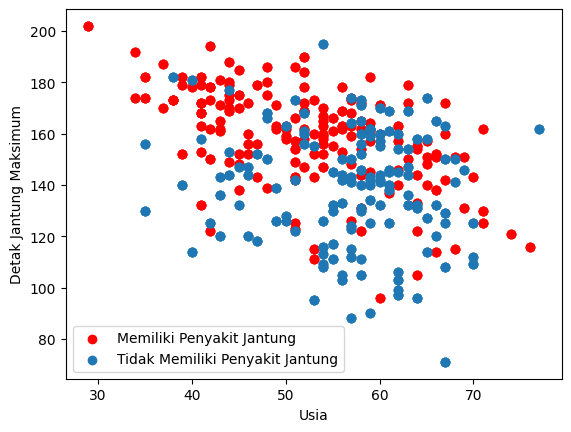

In [20]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Memiliki Penyakit Jantung", "Tidak Memiliki Penyakit Jantung"])
plt.xlabel("Usia")
plt.ylabel("Detak Jantung Maksimum")
plt.show()

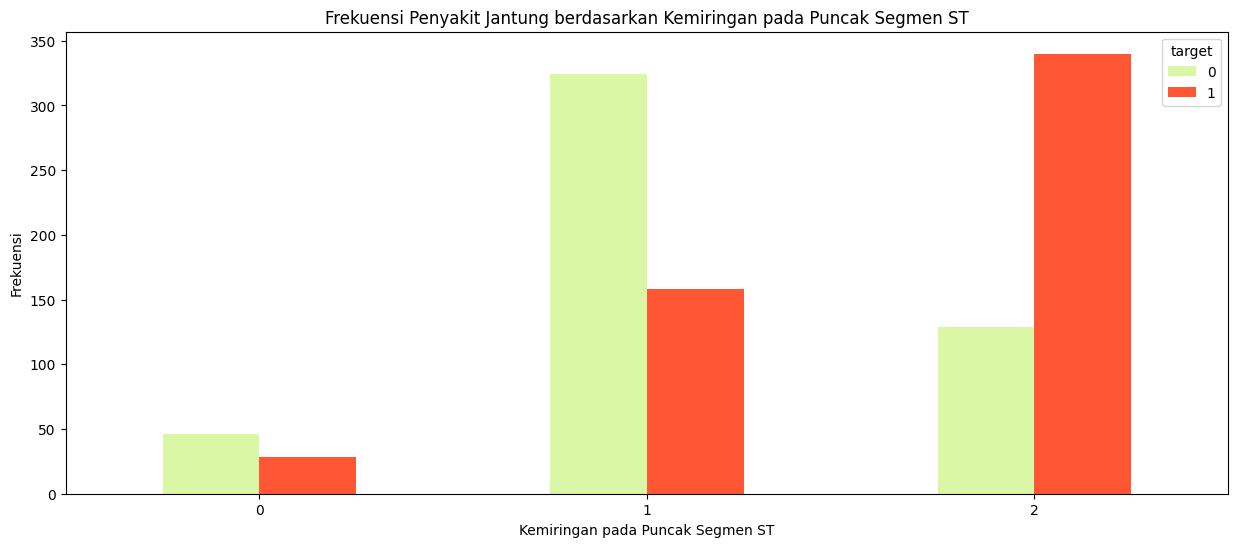

In [21]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Frekuensi Penyakit Jantung berdasarkan Kemiringan pada Puncak Segmen ST')
plt.xlabel('Kemiringan pada Puncak Segmen ST')
plt.xticks(rotation = 0)
plt.ylabel('Frekuensi')
plt.show()

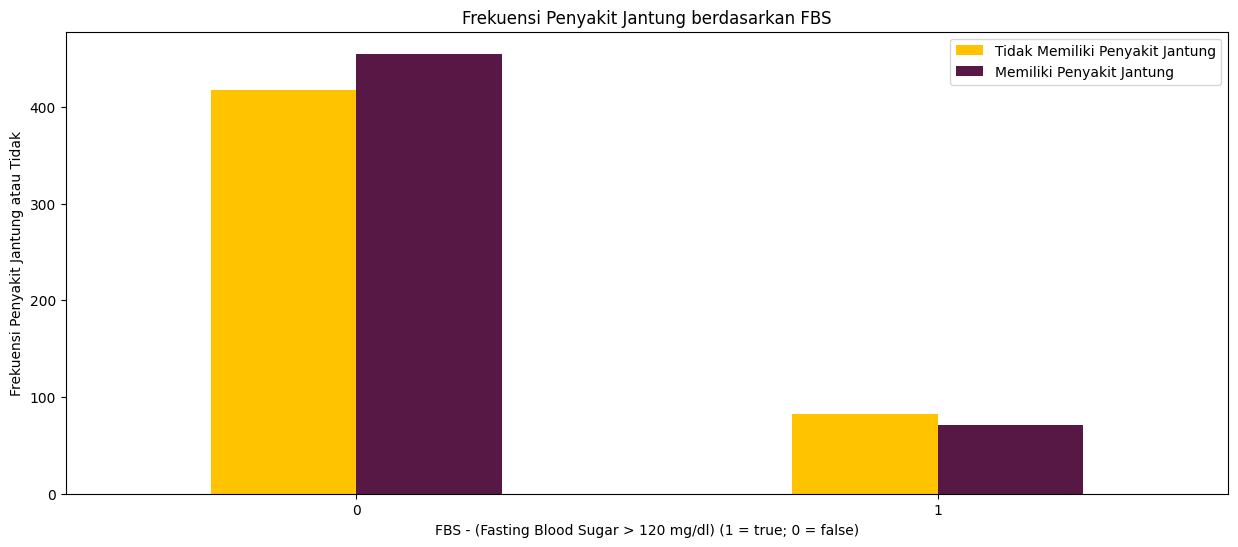

In [22]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Frekuensi Penyakit Jantung berdasarkan FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Tidak Memiliki Penyakit Jantung", "Memiliki Penyakit Jantung"])
plt.ylabel('Frekuensi Penyakit Jantung atau Tidak')
plt.show()

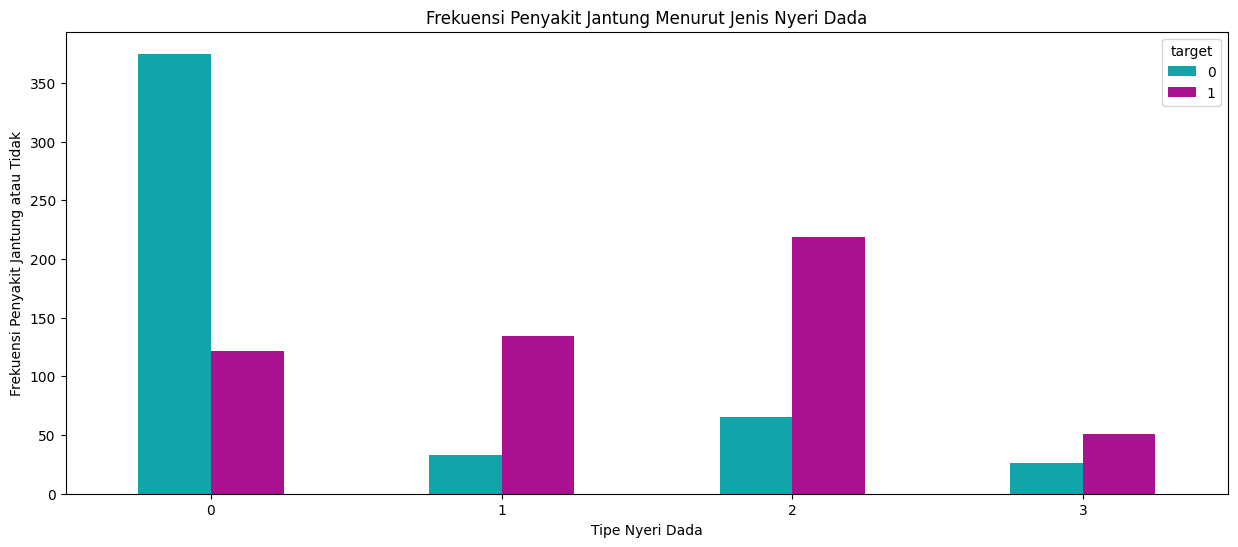

In [23]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Frekuensi Penyakit Jantung Menurut Jenis Nyeri Dada')
plt.xlabel('Tipe Nyeri Dada')
plt.xticks(rotation = 0)
plt.ylabel('Frekuensi Penyakit Jantung atau Tidak')
plt.show()

In [24]:
scaler = MinMaxScaler()

normalized_array = scaler.fit_transform(data[['sex','chol','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']])
normalized_data = pd.DataFrame(normalized_array, columns=['sex','chol','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

data[['sex','chol','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']] = normalized_data

In [25]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1.0,0,125,0.196347,0.0,0.5,168,0.0,1.0,1.0,0.50,1.000000,0
1,53,1.0,0,140,0.175799,1.0,0.0,155,1.0,3.1,0.0,0.00,1.000000,0
2,70,1.0,0,145,0.109589,0.0,0.5,125,1.0,2.6,0.0,0.00,1.000000,0
3,61,1.0,0,148,0.175799,0.0,0.5,161,0.0,0.0,1.0,0.25,1.000000,0
4,62,0.0,0,138,0.383562,1.0,0.5,106,0.0,1.9,0.5,0.75,0.666667,0


In [ ]:
correlations = data.corr()
plt.figure(figsize=(10, 10))

heatmap_heart = sns.heatmap(data[correlations.index].corr(), annot=True, cmap='RdYlGn')

plt.show()

## Modelling Decision Tree

In [ ]:
# Split data menjadi data train dan test
X = data.drop(['target'], axis = 1).values 
y = data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Evaluation

In [ ]:
# Training Model
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)

dt_classifier.fit(X_train, y_train)

y_pred_test_gini = dt_classifier.predict(X_test)
y_pred_train_gini = dt_classifier.predict(X_train)

In [ ]:
# Menampilkan gambar pohon dari Decision Tree
plt.figure(figsize=(27,5))

from sklearn import tree

tree.plot_tree(dt_classifier.fit(X_train, y_train)) 

## Data Test

In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Test-set accuracy score:', dt_classifier.score(X_test, y_test))

In [ ]:
# Menampilkan nilai akurasi dari model Decision Tree
print(accuracy_score(y_test,y_pred_test_gini))
dt_score1 = (accuracy_score(y_test,y_pred_test_gini))

In [ ]:
# Menampilkan nilai precision dari model Decision Tree
print(precision_score(y_test,y_pred_test_gini))
dt_ps1 = (precision_score(y_test,y_pred_test_gini))

In [ ]:
# Menampilkan nilai recall dari model Decision Tree
print(recall_score(y_test,y_pred_test_gini))
dt_rs1 = (recall_score(y_test,y_pred_test_gini))

In [ ]:
# Menampilkan nilai F1-score dari model Decision Tree
print(f1_score(y_test,y_pred_test_gini))
dt_fs1 = (f1_score(y_test,y_pred_test_gini))

In [ ]:
# Menampilkan Confusion Matrix dari data test
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_test_gini)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_gini))

## Data Train

In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', dt_classifier.score(X_train, y_train))

In [ ]:
# Menampilkan nilai akurasi dari model Decision Tree
print(accuracy_score(y_train,y_pred_train_gini))
dt_score2 = (accuracy_score(y_train,y_pred_train_gini))

In [ ]:
# Menampilkan nilai precision dari model Decision Tree
print(precision_score(y_train,y_pred_train_gini))
dt_ps2 = (precision_score(y_train,y_pred_train_gini))

In [ ]:
# Menampilkan nilai recall dari model Decision Tree
print(recall_score(y_train,y_pred_train_gini))
dt_rs2 = (recall_score(y_train,y_pred_train_gini))

In [ ]:
# Menampilkan nilai F1-score dari model Decision Tree
print(f1_score(y_train,y_pred_train_gini))
dt_fs2 = (f1_score(y_train,y_pred_train_gini))

In [ ]:
# Menampilkan Confusion Matrix dari data Train
cnf_matrix = confusion_matrix(y_train, y_pred_train_gini)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train_gini))

## Evaluation Model

In [ ]:
accuracy_train = dt_classifier.score(X_train, y_train)
accuracy_test  = dt_classifier.score(X_test, y_test)

In [ ]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

In [ ]:
joblib.dump((dt_classifier), "model_heartdisease_dt.model")

In [ ]:
data_test = pd.DataFrame(data={
    "age" : [45],	
    "sex" : [1], 
    "cp"	: [0],
    "trestbps" : [109],
    "chol"	: [1],
    "fbs" : [0],
    "restecg" : [0],
    "exang" : [1],	
    "oldpeak" : [2],
    "slope"	: [3],
    "ca" : [1],
    "thal" : [0],
    "chol"  : [120],
    "thalach" : [190]
})

data_test[0:1]

In [ ]:
pred_test = dt_classifier.predict(data_test[0:1])
pred_test[0]

## Modelling KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)

    test_accuracy[i] = knn.score(X_test, y_test) 

In [ ]:
# Menampilkan plot 
plt.title('Variasi jumlah neighbors pada KNN')
plt.plot(neighbors, test_accuracy, label='Akurasi Test')
plt.plot(neighbors, train_accuracy, label='Akurasi Train')
plt.legend()
plt.xlabel('Angka dari neighbors')
plt.ylabel('Akurasi')
plt.show()

In [ ]:
# Training Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

## Evaluation

In [ ]:
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [ ]:
joblib.dump((knn), "model2_heartdisease_dt.model")

## Data Test

In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Test-set accuracy score:', dt_classifier.score(X_test, y_test))

In [ ]:
# Menampilkan nilai akurasi dari model KNN
print(accuracy_score(y_test,y_test_pred))
knn_score1 = (accuracy_score(y_test,y_test_pred))

In [ ]:
# Menampilkan nilai precision dari model KNN
print(precision_score(y_test,y_test_pred))
knn_ps1 = (precision_score(y_test,y_test_pred))

In [ ]:
# Menampilkan nilai recall dari model KNN
print(recall_score(y_test,y_test_pred))
knn_rs1 = (recall_score(y_test,y_test_pred))

In [ ]:
# Menampilkan nilai F1-score dari model KNN
print(f1_score(y_test,y_test_pred))
knn_fs1 = (f1_score(y_test,y_test_pred))

In [ ]:
# Menampilkan Confusin Matrix dari data test
cnf_matrix = confusion_matrix(y_test,y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test,y_test_pred))

## Data Train

In [ ]:
# Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', dt_classifier.score(X_train, y_train))

In [ ]:
# Menampilkan nilai akurasi dari model KNN
print(accuracy_score(y_train,y_train_pred))
knn_score2 = (accuracy_score(y_train,y_train_pred))

In [ ]:
# Menampilkan nilai precision dari model KNN
print(precision_score(y_train,y_train_pred))
knn_ps2 = (precision_score(y_train,y_train_pred))

In [ ]:
# Menampilkan nilai recall dari model KNN
print(recall_score(y_train,y_train_pred))
knn_rs2 = (recall_score(y_train,y_train_pred))

In [ ]:
# Menampilkan nilai F1-score dari model KNN
print(f1_score(y_train,y_train_pred))
knn_fs2 = (f1_score(y_train,y_train_pred))

In [ ]:
# Menampilan Confusion Matrix dari data train
cnf_matrix = confusion_matrix(y_train,y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_train,y_train_pred))

## Modelling AdaBoost


In [ ]:
# Training Model
from sklearn.ensemble import AdaBoostClassifier

ab_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=0)

model_adaboost = ab_classifier.fit(X_train, y_train)

y_test_pred = model_adaboost.predict(X_test)
y_train_pred = model_adaboost.predict(X_train)

In [ ]:
joblib.dump((ab_classifier), "model3_heartdisease_dt.model")

## Data Test

In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data test
print('Test-set accuracy score:', ab_classifier.score(X_test, y_test))

In [ ]:
# Menampilkan nilai akurasi dari model AdaBoost
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_test_pred))
ab_score1 = accuracy_score(y_test, y_test_pred)

In [ ]:
# Menampilkan nilai precision dari model AdaBoost
print(precision_score(y_test,y_test_pred))
ab_ps1 = (precision_score(y_test,y_test_pred))

In [ ]:
# Menampilkan nilai recall dari model AdaBoost
print(recall_score(y_test,y_test_pred))
ab_rs1 = (recall_score(y_test,y_test_pred))

In [ ]:
# Menampilkan nilai F1-score dari model AdaBoost
print(f1_score(y_test,y_test_pred))
ab_fs1 = (f1_score(y_test,y_test_pred))

In [ ]:
# Menampilan Confusion Matrix dari data test
cnf_matrix = confusion_matrix(y_test,y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred))

## Data Train

In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', ab_classifier.score(X_train, y_train))

In [ ]:
# Menampilkan nilai akurasi dari model AdaBoost
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_train, y_train_pred))
ab_score2 = accuracy_score(y_train, y_train_pred)

In [ ]:
# Menampilkan nilai precision dari model AdaBoost
print(precision_score(y_train,y_train_pred))
ab_ps2 = (precision_score(y_train,y_train_pred))

In [ ]:
# Menampilkan nilai recall dari model AdaBoost
print(recall_score(y_train,y_train_pred))
ab_rs2 = (recall_score(y_train,y_train_pred))

In [ ]:
# Menampilkan nilai F1-score dari model AdaBoost
print(f1_score(y_train,y_train_pred))
ab_fs2 = (f1_score(y_train,y_train_pred))

In [ ]:
# Menampilan Confusion Matrix dari data train
cnf_matrix = confusion_matrix(y_train,y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_train, y_train_pred))

## Modelling XGBoost

In [ ]:
# # Split data menjadi data train dan test
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(n_estimators=50, max_depth=6, learning_rate=0.1, subsample=0.5)
xgb_classifier = xgb_classifier.fit(X_train, y_train)

# Training Model
y_test_pred = xgb_classifier.predict(X_test)
y_train_pred = xgb_classifier.predict(X_train)

In [ ]:
accuracy_train = xgb_classifier.score(X_train, y_train)
accuracy_test  = xgb_classifier.score(X_test, y_test)

In [ ]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

In [ ]:
joblib.dump((xgb_classifier), "model4_heartdisease_dt.model")

## Prediction

In [ ]:
data_test = pd.DataFrame(data={
    "age" : [45],	
    "sex" : [1], 
    "cp"	: [0],
    "trestbps" : [109],
    "chol"	: [1],
    "fbs" : [0],
    "restecg" : [0],
    "exang" : [1],	
    "oldpeak" : [2],
    "slope"	: [3],
    "ca" : [1],
    "thal" : [0],
    "chol"  : [120],
    "thalach" : [190]
})

data_test[0:1]

In [ ]:
pred_test = xgb_classifier.predict(data_test[0:1])
pred_test[0]

## Data Test

In [ ]:
# Menampilkan nilai akurasi untuk prediksi di data testing
print('Test-set accuracy score:', xgb_classifier.score(X_test, y_test))

In [ ]:
# Menampilkan nilai akurasi dari model XGBoost
print("Accuracy score XGBoost: %.2f" % (accuracy_score(y_test, y_test_pred)))
xgb_score1 = (accuracy_score(y_test, y_test_pred))

In [ ]:
# Menampilkan nilai precision dari model XGBoost
print(precision_score(y_test,y_test_pred))
xgb_ps1 = (precision_score(y_test,y_test_pred))

In [ ]:
# Menampilkan nilai recall dari model XGBoost
print(recall_score(y_test,y_test_pred))
xgb_rs1 = (recall_score(y_test,y_test_pred))

In [ ]:
# Menampilkan nilai F1-score dari model XGBoost
print(f1_score(y_test,y_test_pred))
xgb_fs1 = (f1_score(y_test,y_test_pred))

In [ ]:
# Menampilan Confusion Matrix dari data test
cnf_matrix = confusion_matrix(y_test,y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print((classification_report(y_test, y_test_pred)))

## Data Train

In [ ]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', xgb_classifier.score(X_train, y_train))

In [ ]:
# Menampilkan nilai akurasi dari model XGBoost
print("Accuracy score XGBoost: %.2f" % (accuracy_score(y_train, y_train_pred)))
xgb_score2 = (accuracy_score(y_train, y_train_pred))

In [ ]:
# Menampilkan nilai precision dari model XGBoost
print(precision_score(y_train,y_train_pred))
xgb_ps2 = (precision_score(y_train,y_train_pred))

In [ ]:
# Menampilkan nilai recall dari model XGBoost
print(recall_score(y_train,y_train_pred))
xgb_rs2 = (recall_score(y_train,y_train_pred))

In [ ]:
# Menampilkan nilai F1-score dari model XGBoost
print(f1_score(y_train,y_train_pred))
xgb_fs2 = (f1_score(y_train,y_train_pred))

In [ ]:
# Menampilan Confusion Matrix dari data train
cnf_matrix = confusion_matrix(y_train,y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print((classification_report(y_train, y_train_pred)))

## Perbandingan Model Data Test

In [ ]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'KNN', 
              'XGBoost', 'AdaBoost'],
    'Accuracy': [dt_score1, knn_score1, xgb_score1, ab_score1],
    'Precision ': [dt_ps1, knn_ps1, ab_ps1, xgb_ps1],
    'Recall': [dt_rs1, knn_rs1, ab_rs1, xgb_rs1],
    'F1-Score': [dt_fs1, knn_fs1, ab_fs1, xgb_fs1]})
result_data = results.sort_values(by='Accuracy', ascending=False)
result_data = result_data.set_index('Model')
result_data

## Perbandingan Model Data Train

In [ ]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'KNN', 
              'XGBoost', 'AdaBoost'],
    'Accuracy': [dt_score2, knn_score2, xgb_score2, ab_score2],
    'Precision ': [dt_ps2, knn_ps2, ab_ps2, xgb_ps2],
    'Recall': [dt_rs2, knn_rs2, ab_rs2, xgb_rs2],
    'F1-Score': [dt_fs2, knn_fs2, ab_fs2, xgb_fs2]})
result_data = results.sort_values(by='Accuracy', ascending=False)
result_data = result_data.set_index('Model')
result_data